___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Example for Sine Wave

In [113]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Data

Let's use Numpy to create a simple sine wave.

In [114]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [115]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [116]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

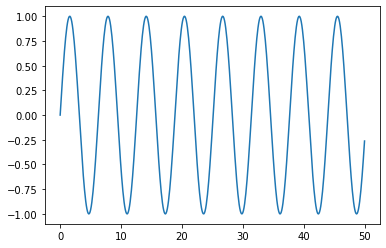

In [117]:
plt.plot(x,y)

Let's turn this into a DataFrame

In [118]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [119]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


## Train Test Split

Note! This is very different from our usual test/train split methodology!

In [120]:
len(df)

501

In [121]:
test_percent = 0.1

In [122]:
len(df)*test_percent

50.1

In [123]:
test_point = np.round(len(df)*test_percent)

In [124]:
test_ind = int(len(df) - test_point)

In [125]:
test_ind

451

In [126]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [127]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [128]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


## Scale Data

In [129]:
from sklearn.preprocessing import MinMaxScaler

In [130]:
scaler = MinMaxScaler()

In [131]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler()

In [132]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [133]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [134]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


In [135]:
# define generator
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [136]:
len(scaled_train)

451

In [137]:
len(generator) # n_input = 2

449

In [139]:
# scaled_train

In [142]:
# What does the first batch look like?
X,y = generator[1]

In [143]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.54991622 0.59933458]
Predict this y: 
 [[0.64776041]]


In [59]:
# Let's redefine to get 10 steps back and then predict the next step out
length = 10 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [60]:
# What does the first batch look like?
X,y = generator[0]

In [61]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.49999912 0.54991622 0.59933458 0.64776041 0.69470985 0.73971381
 0.78232262 0.82211054 0.85868004 0.89166571]
Predict this y: 
 [[0.92073798]]


In [62]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

Now you will be able to edit the length so that it makes sense for your time series!

### Create the Model

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN

In [64]:
# We're only using one feature in our time series
n_features = 1

In [65]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [67]:
# fit model
model.fit_generator(generator,epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
401/401 [==============================] - 2s 5ms/step - loss: 0.0035
Epoch 2/5
401/401 [==============================] - 2s 5ms/step - loss: 1.3198e-04
Epoch 3/5
401/401 [==============================] - 2s 5ms/step - loss: 3.8960e-05
Epoch 4/5
401/401 [==============================] - 2s 5ms/step - loss: 6.2327e-04
Epoch 5/5
401/401 [==============================] - 2s 5ms/step - loss: 5.6019e-06


In [68]:
model.history.history.keys()

dict_keys(['loss'])

<AxesSubplot:>

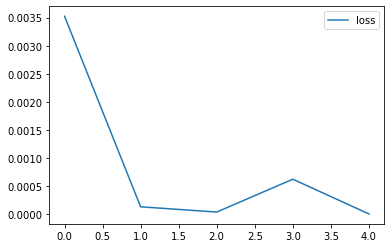

In [69]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [70]:
first_eval_batch = scaled_train[-length:]

In [71]:
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [72]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [73]:
model.predict(first_eval_batch)

array([[0.9451879]], dtype=float32)

In [74]:
scaled_test[0]

array([0.94955134])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

In [75]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [76]:
current_batch.shape

(1, 50, 1)

In [77]:
current_batch

array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

In [78]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [79]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [80]:
test_predictions

[array([0.9451879], dtype=float32),
 array([0.96215], dtype=float32),
 array([0.9749713], dtype=float32),
 array([0.98253363], dtype=float32),
 array([0.9846245], dtype=float32),
 array([0.98221564], dtype=float32),
 array([0.9750367], dtype=float32),
 array([0.96286666], dtype=float32),
 array([0.94643855], dtype=float32),
 array([0.9257056], dtype=float32),
 array([0.90090805], dtype=float32),
 array([0.8716389], dtype=float32),
 array([0.83848107], dtype=float32),
 array([0.8025186], dtype=float32),
 array([0.76342976], dtype=float32),
 array([0.7217615], dtype=float32),
 array([0.6778805], dtype=float32),
 array([0.63154083], dtype=float32),
 array([0.5842213], dtype=float32),
 array([0.5359522], dtype=float32),
 array([0.48683232], dtype=float32),
 array([0.43719846], dtype=float32),
 array([0.38774416], dtype=float32),
 array([0.3388954], dtype=float32),
 array([0.29141876], dtype=float32),
 array([0.2455201], dtype=float32),
 array([0.2016419], dtype=float32),
 array([0.16068427

In [81]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


## Inverse Transformations and Compare

In [82]:
true_predictions = scaler.inverse_transform(test_predictions)

In [83]:
true_predictions

array([[ 0.89037048],
       [ 0.92429431],
       [ 0.94993673],
       [ 0.96506129],
       [ 0.969243  ],
       [ 0.96442531],
       [ 0.9500675 ],
       [ 0.92572767],
       [ 0.8928717 ],
       [ 0.85140616],
       [ 0.80181144],
       [ 0.74327359],
       [ 0.67695847],
       [ 0.60503412],
       [ 0.52685706],
       [ 0.44352126],
       [ 0.35575996],
       [ 0.26308133],
       [ 0.16844302],
       [ 0.07190561],
       [-0.02633338],
       [-0.1256003 ],
       [-0.22450811],
       [-0.32220483],
       [-0.41715736],
       [-0.50895395],
       [-0.59670964],
       [-0.67862424],
       [-0.75385137],
       [-0.82177382],
       [-0.88057341],
       [-0.92973185],
       [-0.96963731],
       [-0.99943042],
       [-1.01896206],
       [-1.02763201],
       [-1.02610384],
       [-1.01499446],
       [-0.99454761],
       [-0.96467431],
       [-0.92550885],
       [-0.87824654],
       [-0.82364291],
       [-0.76191507],
       [-0.6929135 ],
       [-0

In [84]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [85]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

C:\Users\anjan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
test

,Sine,Predictions
45.1,0.899097,0.890370
45.2,0.938307,0.924294
45.3,0.968142,0.949937
45.4,0.988304,0.965061
45.5,0.998591,0.969243
45.6,0.998900,0.964425
45.7,0.989229,0.950068
45.8,0.969673,0.925728
45.9,0.940429,0.892872
46.0,0.901788,0.851406


<AxesSubplot:>

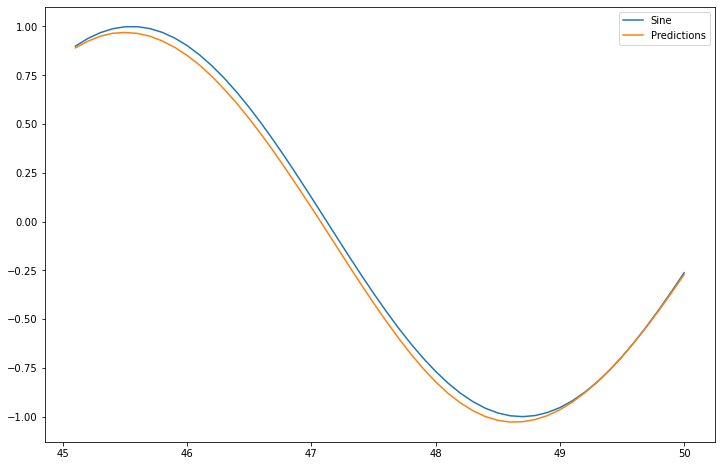

In [87]:
test.plot(figsize=(12,8))

## Adding in Early Stopping and Validation Generator

In [88]:
from tensorflow.keras.callbacks import EarlyStopping

In [89]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [90]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length,batch_size=1)


validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length=length,batch_size=1)

# LSTMS

In [91]:
# define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [92]:
model.fit_generator(generator,epochs=20,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 4s 11ms/step - loss: 0.0148 - val_loss: 2.9511e-05
Epoch 2/20
402/402 [==============================] - 4s 9ms/step - loss: 5.1463e-05 - val_loss: 3.4594e-06
Epoch 3/20
402/402 [==============================] - 4s 11ms/step - loss: 5.5059e-05 - val_loss: 3.4332e-05
Epoch 4/20
402/402 [==============================] - 4s 10ms/step - loss: 3.5403e-04 - val_loss: 3.7000e-06


In [93]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

C:\Users\anjan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:>

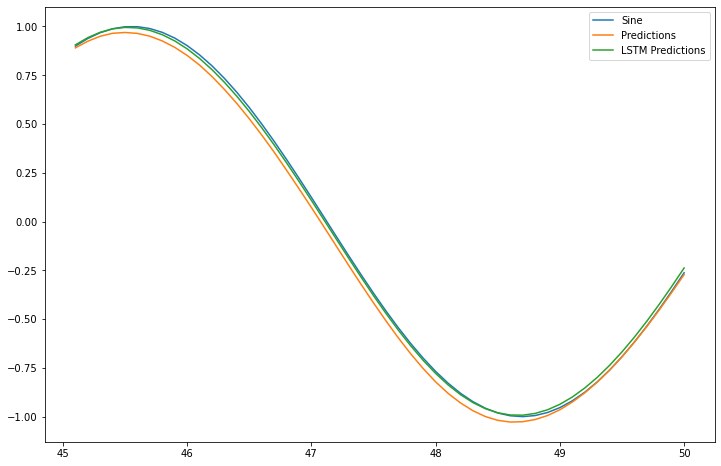

In [94]:
# IGNORE WARNINGS
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

# Forecasting

Forecast into unknown range. We should first utilize all our data, since we are now forecasting!

In [95]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [96]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [97]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=6)

Epoch 1/6
451/451 [==============================] - 5s 10ms/step - loss: 0.0173
Epoch 2/6
451/451 [==============================] - 4s 10ms/step - loss: 8.3672e-05
Epoch 3/6
451/451 [==============================] - 4s 10ms/step - loss: 5.4602e-04
Epoch 4/6
451/451 [==============================] - 4s 10ms/step - loss: 7.9755e-05
Epoch 5/6
451/451 [==============================] - 4s 10ms/step - loss: 7.0096e-05
Epoch 6/6
451/451 [==============================] - 4s 10ms/step - loss: 1.6685e-04


In [98]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [99]:
forecast = scaler.inverse_transform(forecast)

In [100]:
# forecast

In [101]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [102]:
len(forecast)

50

In [103]:
50*0.1

5.0

In [105]:
forecast_index = np.arange(50.1,55.1,step=0.1)

In [106]:
len(forecast_index)

50

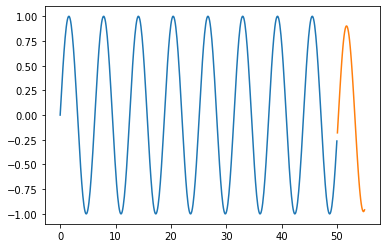

In [107]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)

# Great Job!